<a href="https://colab.research.google.com/github/Sanjeeviit/Business-Analytics/blob/main/BAweek2_3_4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MLR Tutorial week 6

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('/content/05-MLR-correct.xlsx')
df.head(10)

,Unnamed: 0,Y,X1,X2,Unnamed: 4,Unnamed: 5,Unnamed: 6,GPA at college,Entrance exam,interview
0,record,GPA at college,Entrance exam,interview,NaN,NaN,GPA at college,1,0.74666,0.763283
1,1,9.5,9.8,9.1,NaN,NaN,Entrance exam,0.74666,1,0.540056
2,2,6.3,7.5,7.1,NaN,NaN,interview,0.763283,0.540056,1
3,3,8.2,7.9,7.7,NaN,NaN,NaN,NaN,NaN,NaN
4,4,9.1,9.5,9.6,NaN,NaN,NaN,GPA at college,Entrance exam,interview
5,5,8.2,9.1,7.5,NaN,NaN,GPA at college,1,0.74666,0.763283
6,6,8.32,8.5,8.4,NaN,NaN,Entrance exam,0.74666,1,0.540056
7,7,9.6,7.54,9.5,NaN,NaN,interview,0.763283,0.540056,1
8,8,7.6,8.4,7.8,NaN,NaN,NaN,NaN,NaN,NaN
9,9,6.5,5.6,7.8,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.tail(10)

,Unnamed: 0,Y,X1,X2,Unnamed: 4,Unnamed: 5,Unnamed: 6,GPA at college,Entrance exam,interview
10,10,8.64,8,8.5,NaN,NaN,NaN,NaN,NaN,NaN
11,11,9.5,9.8,9.9,NaN,NaN,NaN,NaN,NaN,NaN
12,12,8.1,8,8.9,NaN,NaN,NaN,NaN,NaN,NaN
13,13,7.95,7.5,6.9,NaN,NaN,NaN,NaN,NaN,NaN
14,14,9.99,10,8.9,NaN,NaN,NaN,NaN,NaN,NaN
15,15,6.87,7.6,7.9,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,Y,X1,X2,NaN,NaN,NaN,NaN,NaN,NaN
17,Y,1,0.74666,0.763283,NaN,NaN,NaN,NaN,NaN,NaN
18,X1,0.74666,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,X2,0.763283,0.540056,1,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df2 = df[['Y','X1','X2']]
df2.tail()

,Y,X1,X2
15,6.87,7.6,7.9
16,Y,X1,X2
17,1,0.74666,0.763283
18,0.74666,1,NaN
19,0.763283,0.540056,1


In [15]:
df2.head()

,Y,X1,X2
0,GPA at college,Entrance exam,interview
1,9.5,9.8,9.1
2,6.3,7.5,7.1
3,8.2,7.9,7.7
4,9.1,9.5,9.6


In [16]:
df2 = df2.drop(df2.index[0])
df2

,Y,X1,X2
1,9.5,9.8,9.1
2,6.3,7.5,7.1
3,8.2,7.9,7.7
4,9.1,9.5,9.6
5,8.2,9.1,7.5
6,8.32,8.5,8.4
7,9.6,7.54,9.5
8,7.6,8.4,7.8
9,6.5,5.6,7.8
10,8.64,8,8.5


In [20]:
# Reset the index after dropping rows to ensure the index is sequential
df2 = df2.reset_index(drop=True)

# Now you can drop rows by their new indices if they exist
df2 = df2.drop([17,18,19,20], errors='ignore') # 'ignore' will suppress the KeyError if any of these indices don't exist
df2

,Y,X1,X2
0,9.5,9.8,9.1
1,6.3,7.5,7.1
2,8.2,7.9,7.7
3,9.1,9.5,9.6
4,8.2,9.1,7.5
5,8.32,8.5,8.4
6,9.6,7.54,9.5
7,7.6,8.4,7.8
8,6.5,5.6,7.8
9,8.64,8,8.5


In [21]:
df2.rename(columns={'Y':'GPA','X1':'Entrance','X2':'Interview'},inplace = True)
df2

,GPA,Entrance,Interview
0,9.5,9.8,9.1
1,6.3,7.5,7.1
2,8.2,7.9,7.7
3,9.1,9.5,9.6
4,8.2,9.1,7.5
5,8.32,8.5,8.4
6,9.6,7.54,9.5
7,7.6,8.4,7.8
8,6.5,5.6,7.8
9,8.64,8,8.5


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   GPA        15 non-null     object
 1   Entrance   15 non-null     object
 2   Interview  15 non-null     object
dtypes: object(3)
memory usage: 488.0+ bytes


In [24]:
df2 = df2.astype(float)
df2

,GPA,Entrance,Interview
0,9.50,9.80,9.1
1,6.30,7.50,7.1
2,8.20,7.90,7.7
3,9.10,9.50,9.6
4,8.20,9.10,7.5
5,8.32,8.50,8.4
6,9.60,7.54,9.5
7,7.60,8.40,7.8
8,6.50,5.60,7.8
9,8.64,8.00,8.5


In [25]:
df2.shape

(15, 3)

In [27]:
df2 =df2.reset_index()
df2

,index,GPA,Entrance,Interview
0,0,9.50,9.80,9.1
1,1,6.30,7.50,7.1
2,2,8.20,7.90,7.7
3,3,9.10,9.50,9.6
4,4,8.20,9.10,7.5
5,5,8.32,8.50,8.4
6,6,9.60,7.54,9.5
7,7,7.60,8.40,7.8
8,8,6.50,5.60,7.8
9,9,8.64,8.00,8.5


In [26]:
df2.head()

,GPA,Entrance,Interview
0,9.5,9.8,9.1
1,6.3,7.5,7.1
2,8.2,7.9,7.7
3,9.1,9.5,9.6
4,8.2,9.1,7.5


In [28]:
df2 = df2[['GPA','Entrance','Interview']]
df2

,GPA,Entrance,Interview
0,9.50,9.80,9.1
1,6.30,7.50,7.1
2,8.20,7.90,7.7
3,9.10,9.50,9.6
4,8.20,9.10,7.5
5,8.32,8.50,8.4
6,9.60,7.54,9.5
7,7.60,8.40,7.8
8,6.50,5.60,7.8
9,8.64,8.00,8.5


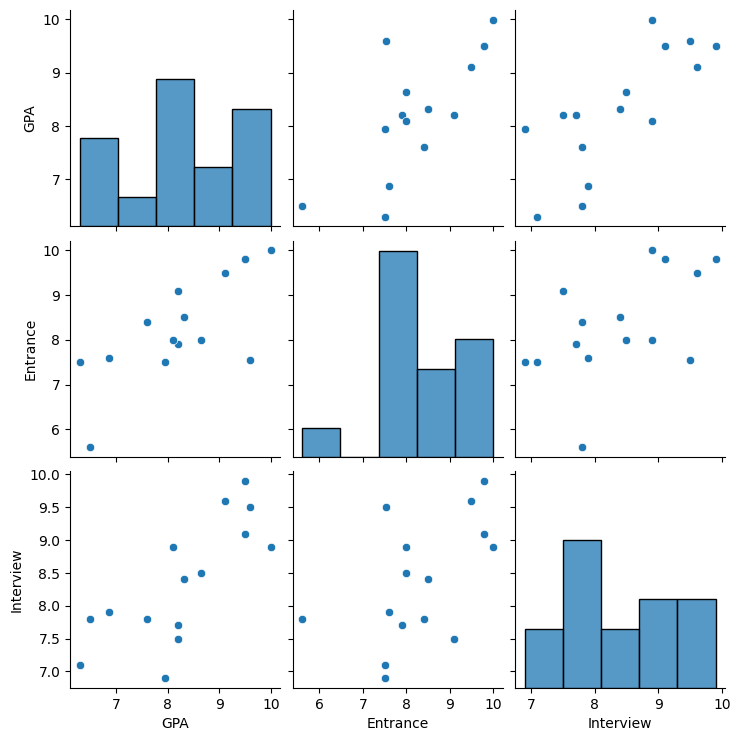

In [29]:
import seaborn as sns
sns.pairplot(df2)

In [30]:
import statsmodels.api as sm
X = sm.add_constant(df2[['Entrance','Interview']])
y = df2['GPA']
model = sm.OLS(y,X).fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     17.12
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           0.000305
Time:                        04:27:43   Log-Likelihood:                -12.591
No. Observations:                  15   AIC:                             31.18
Df Residuals:                      12   BIC:                             33.31
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7044      1.577     -0.447      0.663      -4.139       2.731
Entrance       0.4554      0.169      2.702      0.019       0.088       0.823
Interview      0.6225      0.214      2.909      0.013       0.156       1.089
==============================================================================
Omnibus:                        1.222   Durbin-Watson:                   2.509
Prob(Omnibus):                  0.543   Jarque-Bera (JB):                0.870
Skew:                           0.275   Prob(JB):                        0.647
Kurtosis:                       1.956   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
df2.rename(columns={'Y':'GPA','X1':'Entrance','X2':'Interview '},inplace=True)
df2.head()

<ipython-input-55-b6b624d7afe7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={'Y':'GPA','X1':'Entrance','X2':'Interview '},inplace=True)


,GPA,Entrance,Interview
0,GPA at college,Entrance exam,interview
1,9.5,9.8,9.1
2,6.3,7.5,7.1
3,8.2,7.9,7.7
4,9.1,9.5,9.6


In [61]:
df2.drop([0])
df2.shape

(16, 3)

In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   GPA         16 non-null     object
 1   Entrance    16 non-null     object
 2   Interview   16 non-null     object
dtypes: object(3)
memory usage: 512.0+ bytes


In [60]:
# Rename the columns to remove spaces and special characters
df2 = df2.astype(float)


ValueError: could not convert string to float: 'GPA at college'

[week 5 assignment, Chi squared test of Independence

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/iitm_onlineDegree.csv')
from scipy import stats
from scipy.stats import poisson,uniform,chi2
from scipy.stats import chisquare
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
df.head(10)

,Gender,Preference
0,Female,Business
1,Female,Programming
2,Male,Business
3,Female,Statistics
4,Female,Programming
5,Male,Statistics
6,Female,Statistics
7,Male,Statistics
8,Female,Statistics
9,Female,Programming


In [ ]:
df.shape[:]

(732, 2)

In [ ]:
df.describe()

,Gender,Preference
count,732,732
unique,2,3
top,Female,Statistics
freq,433,324


In [ ]:
contingTab = pd.crosstab(df.Gender,df.Preference, margins=True) # observed frency

In [ ]:
contingTab

Preference,Business,Programming,Statistics,All
Gender,,,,
Female,175,58,200,433
Male,139,36,124,299
All,314,94,324,732


Expecetd frequency

In [ ]:
contingTab.iloc[:-1,:-1]

Preference,Business,Programming,Statistics
Gender,,,
Female,175,58,200
Male,139,36,124


In [ ]:
contingTab['Business']

Gender
Female    175
Male      139
All       314
Name: Business, dtype: int64

In [ ]:
contingTab['All']['All']

732

In [ ]:
contingTab.transpose()

Gender,Female,Male,All
Preference,,,
Business,175,139,314
Programming,58,36,94
Statistics,200,124,324
All,433,299,732


In [ ]:
Females = list(df['Gender'].unique())
Males =list(df['Preference'].unique())
exp1 ={}

for i in Females:
  exp2 ={}
  for j in Males:
    exp2[j]=contingTab.transpose()[i]['All']*contingTab[j]['All'] /contingTab['All']['All']
    exp1[i]=exp2


In [ ]:
exp1 # expected frequency

{'Female': {'Business': 185.74043715846994,
  'Programming': 55.60382513661202,
  'Statistics': 191.65573770491804},
 'Male': {'Business': 128.25956284153006,
  'Programming': 38.39617486338798,
  'Statistics': 132.34426229508196}}

In [ ]:
314*433/732


185.74043715846994

In [ ]:
chisquareCal =0
for i in Females:
  for j in Males:
    #chisquareCal += (contingTab.transpose()[i][j] - exp1[i][j])**2/exp1[i][j]
    val = (contingTab.transpose()[i][j] - exp1[i][j])**2/exp1[i][j]
    chisquareCal += val

In [ ]:
chisquareCal

2.662658927192708

In [ ]:
# dof
dof = (len(Females)-1)*(len(Males)-1)
dof

2

In [ ]:
stats.chi2.ppf(0.95,dof)

5.991464547107979

In [ ]:
# since x2 computed is < x2 tab do not reject
# pvalue = 0.26 alpha = 0.05 since p value is not less than alpha do not reject

In [ ]:
contab = np.array([contingTab.transpose()['Female'][0:3].values,
                   contingTab.transpose()['Male'][0:3].values])
stats.chi2_contingency(contab)

Chi2ContingencyResult(statistic=2.662658927192708, pvalue=0.26412588203358844, dof=2, expected_freq=array([[185.74043716,  55.60382514, 191.6557377 ],
       [128.25956284,  38.39617486, 132.3442623 ]]))

In [ ]:
1-stats.chi2.cdf(chisquareCal,dof)

0.26412588203358844

In [ ]:
df.Gender['Female']

KeyError: 'Female'

In [ ]:
plt.hist(df['obs'])
plt.show()

In [ ]:
import pandas as pd

# Load the data
file_path = '/content/GOF_24t2_3xlsx.xlsx'
df = pd.read_excel(file_path)

# Check the unique values in the "obs" column
unique_values = df['obs'].unique()
print("Unique values in 'obs' column:", unique_values)


In [ ]:
mean_scratches = df['obs'].mean()

print("Expected number of scratches on a car:", mean_scratches)


In [ ]:
# Calculate Mean, Median, and Mode
mean_scratches = df['obs'].mean()
median_scratches = df['obs'].median()
mode_scratches = df['obs'].mode()[0]

# Print the values
print("Mean:", mean_scratches)
print("Median:", median_scratches)
print("Mode:", mode_scratches)

# Visualization
plt.hist(df['obs'], bins=10, edgecolor='k', alpha=0.7)
plt.axvline(mean_scratches, color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_scratches, color='g', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(mode_scratches, color='b', linestyle='dashed', linewidth=1, label='Mode')
plt.legend()
plt.title('Histogram of Scratches')
plt.xlabel('Number of Scratches')
plt.ylabel('Frequency')
plt.show()


In [ ]:
stats_labels = ['Variance Observed', 'Skewness Observed',  'Kurtosis Observed']
stats_values = [df['obs'].var(), df['obs'].skew(), df['obs'].kurt()]
print(set(zip(stats_labels,stats_values)))

Kurtosis < 3: The distribution has lighter tails and a flatter peak than the normal distribution (platykurtic).observed variance is approximately 4.6, which provides a measure of how much the number of scratches varies in your dataset.Skewness < 0: The distribution is negatively skewed (left-skewed), meaning the left tail is longer or fatter than the right.

In [ ]:
# qq plot for tails pp plots for the middle sec
import statsmodels.api as sm
import scipy.stats as stats

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm,uniform,poisson,chisquare,chi2
mu = df['obs'].mean()
sm.qqplot(df['obs'],stats.poisson(mu,), line='45')
plt.show()

In [ ]:
stats.probplot(df['obs'], dist="poisson",sparams=(mu,), plot=plt)
plt.show()

In [ ]:
df['bins']= pd.cut(df['obs'],10)
df.head()

In [ ]:
df_2 = pd.DataFrame()
df_2['Observed Frequency']= (df.groupby('bins').count())
df_2

In [ ]:
df_2 = pd.DataFrame()
df_2['Observed Frequency']= (df.groupby('bins').count())
df_2

In [ ]:
grouped_df =pd.DataFrame()
grouped_df

In [ ]:
grouped_df['Poisson_PMF']= poisson.pmf(k=grouped_df.index,mu=df['obs'].mean())
grouped_df

In [ ]:
grouped_df['Expected Frequency']= grouped_df['Poisson_PMF']*len(df)
grouped_df

In [ ]:
observed_sum = grouped_df['Observed Frequency'].sum()
expected_sum = grouped_df['Expected Frequency'].sum()
print("Observed Sum:", observed_sum)
print("Expected Sum:", expected_sum)

GOF Poisson week 2 tutorial

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('/content/GOF_24t2_3xlsx.xlsx')
df.head(10)

In [ ]:
df.shape[:]

In [ ]:
df.describe()

In [ ]:
plt.hist(df['obs'])
plt.show()

In [ ]:
stats_labels = ['Variance Observed', 'Skewness Observed',  'Kurtosis Observed']
stats_values = [df['obs'].var(), df['obs'].skew(), df['obs'].kurt()]
print(set(zip(stats_labels,stats_values)))

In [ ]:
# qq plot for tails pp plots for the middle sec
import statsmodels.api as sm
import scipy.stats as stats

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm,uniform,poisson,chisquare,chi2
mu = df['obs'].mean()
sm.qqplot(df['obs'],stats.poisson(mu,), line='45')
plt.show()


In [ ]:
stats.probplot(df['obs'], dist="poisson",sparams=(mu,), plot=plt)
plt.show()

In [ ]:
df['bins']= pd.cut(df['obs'],10)
df.head()

In [ ]:
df_2 = pd.DataFrame()
df_2['Observed Frequency']= (df.groupby('bins').count())
df_2

In [ ]:
grouped_df =pd.DataFrame()
grouped_df

In [ ]:
grouped_df['Observed Frequency'] = df.groupby('obs')['obs'].count()
grouped_df

In [ ]:
grouped_df['Poisson_PMF']= poisson.pmf(k=grouped_df.index,mu=df['obs'].mean())
grouped_df

In [ ]:
grouped_df['Expected Frequency']= grouped_df['Poisson_PMF']*len(df)
grouped_df

In [ ]:
observed_sum = grouped_df['Observed Frequency'].sum()
expected_sum = grouped_df['Expected Frequency'].sum()
print("Observed Sum:", observed_sum)
print("Expected Sum:", expected_sum)

In [ ]:
scaling_factor = observed_sum / expected_sum
grouped_df['Scaled Expected Frequency'] = grouped_df['Expected Frequency'] * scaling_factor

In [ ]:
# Scale the expected frequencies
scaling_factor = observed_sum / expected_sum
grouped_df['Scaled Expected Frequency'] = grouped_df['Expected Frequency'] * scaling_factor

# Perform the Chi-Square test using the scaled expected frequencies
chi2_stat, p_val = chisquare(grouped_df['Observed Frequency'], grouped_df['Scaled Expected Frequency'], ddof=1)
print("Chi-Square Statistic:", chi2_stat)
print("p-value:", p_val)

In [ ]:
chisquare(grouped_df['Observed Frequency'],grouped_df['Scaled Expected Frequency'],ddof=1)

In [ ]:
chi2.ppf(0.95,len(grouped_df)-1-1)

In [ ]:
print(len(grouped_df)-1-1)

week 5 assignment

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('/content/data_Uniform.xlsx')
df.head(10)

In [ ]:
df.describe()

In [ ]:
plt.hist(df['obs'])
plt.show()

In [ ]:
stats_labels = ['Variance Observed', 'Skewness Observed',  'Kurtosis Observed']
stats_values = [df['obs'].var(), df['obs'].skew(), df['obs'].kurt()]
print(set(zip(stats_labels,stats_values)))

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm,uniform,poisson,chisquare,chi2,chi2_contingency

sm.qqplot(df['obs'],stats.uniform, fit=True, line='45')
plt.show()

In [ ]:
stats.probplot(df['obs'], dist="uniform", plot=plt)
plt.show()

In [ ]:
# estimate mu which is long term mean for poisson distribution
#mu = df['obs'].mean()

#sm.qqplot(df['obs'], stats.poisson(mu,), line='45')
#plt.show()

In [ ]:
#mu = df['obs'].mean()
#stats.probplot(df['obs'], dist='poisson',sparams=(mu,), plot=plt)
#plt.show()

In [ ]:
# Null hypothesis The given distribution follows uniform distribution
# H1 = hypothesis The given distribution do not follows uniform distribution
# Chi goodness of fit test

In [ ]:
df['bins']= pd.cut(df['obs'],10)
df.head()

In [ ]:
df2 = pd.DataFrame()
df2['Observed Frequency']= (df.groupby('bins').count())

df2

In [ ]:
mean = df2['Observed Frequency'].mean()
df2['Expected Frequency'] = mean
df2

In [ ]:
chisquare(df2['Observed Frequency'],df2['Expected Frequency'],ddof=2)

In [ ]:
# tabulated chi square value
chi2.ppf(0.95,len(df2)-2-1)

In [ ]:
# reject the null hypothesis if tabulated value is less than computed
# reject the null hypothesis if p value < significance

week 5

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/Constant-elasticity.xlsx')
df.head()

In [ ]:
df2 = df[['Price','Demand']]
df2.head()


In [ ]:
sns.regplot(x='Price',y='Demand',data=df2,fit_reg=False)

In [ ]:
plt.scatter(df2['Price'],df2['Demand'])
plt.show()

In [ ]:
print(df2.corr())
print(df2.cov())


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df2['Price'].values.reshape(-1,1),df2['Demand'])


In [ ]:
from operator import mod
print(model.intercept_)
print(model.coef_)

In [ ]:
from sklearn.metrics import r2_score
r2_score(df2['Demand'],model.predict(df2['Price'].values.reshape(-1,1)))

In [ ]:
rho = df2['Price'].corr(df2['Demand'])
rho


In [ ]:
df2['naturalLogPrice'] = np.log(df2['Price'])
df2.head()

In [ ]:
df2['naturalLogDemand'] = np.log(df2['Demand'])
df2.head()

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
regmodel2 = linear_model.LinearRegression()

In [ ]:
regmodel2.fit(df2[['naturalLogPrice']],df2['naturalLogDemand'])

In [ ]:
print(regmodel2.intercept_)
print(regmodel2.coef_)

In [ ]:
rmse

week 4 SLimport data ,finding slr model  output

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('/content/Hitters1.csv')
df.head()

In [ ]:
df.shape

X= df.iloc[:,0].values
Y= df.iloc[:,1].values

In [ ]:
X= df.iloc[:,0].values
y= df.iloc[:,1].values

In [ ]:
X,y

In [ ]:
plt.scatter (X,y)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X.reshape(-1,1),y)

In [ ]:
# reshape your data using array .reshape (-1,1)

In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

In [ ]:
# get r2 value

In [ ]:
from sklearn.metrics import r2_score
r2_score(y,regressor.predict(X.reshape(-1,1)))


In [ ]:
y_pred = regressor.predict(X.reshape(-1,1))
y_pred

In [ ]:
# transfoming data


In [ ]:
y_new =np.sqrt(y)
y_new

from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X.reshape(-1,1),y_new)

print(regressor1.intercept_)
print(regressor1.coef_)
r2_score(y_new,regressor1.predict(X.reshape(-1,1)))

In [ ]:
y_new1 =np.sqrt(y)
y_new1

In [ ]:
from sklearn.linear_model import LinearRegression
regressor2 = LinearRegression()
regressor2.fit(X.reshape(-1,1), y_new1)

print(regressor2.intercept_)
print(regressor2.coef_)
r2_score(y_new,regressor2.predict(X.reshape(-1,1)))

In [ ]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
model_fit = LinearRegression()
model_fit.fit(X_train.reshape(-1,1),y_train)


In [ ]:
y_pred = model_fit.predict(X_test.reshape(-1,1))
y_pred

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
import numpy as np

# Example dataset
X = np.array([
    [-1, 1], [0, 1], [2, 1], [4, 1], [5, 1]
])

# Frequencies
frequencies = np.array([1, 1, 4, 2, 2])

# Expanding the dataset based on frequencies
X_expanded = np.repeat(X, frequencies, axis=0)

# Centering the data (subtracting the mean of each feature)
X_centered = X_expanded - X_expanded.mean(axis=0)

# Computing the covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

# Calculating eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sorting eigenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

# Variance along the first principal component
variance_first_pc = sorted_eigenvalues[0]

print(f"Variance along the first principal component: {variance_first_pc:.3f}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters for the Beta distribution
alpha, beta_param = 2, .2

# Define the x range
x = np.linspace(0, 1, 1000)

# Compute the Beta distribution
y = beta.pdf(x, alpha, beta_param)

# Plot the Beta distribution
plt.plot(x, y, 'b-', label=f'Beta({alpha}, {beta_param})')
plt.fill_between(x, y, alpha=0.2, color='blue')
plt.title(f'Beta Distribution with alpha={alpha} and beta={beta_param}')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the parameters
alpha =-1
beta_param = -1

# Generate the x values
x = np.linspace(0, 1, 1000)

# Compute the Beta PDF values
y = beta.pdf(x, alpha, beta_param)

# Plot the Beta(1,1) distribution
plt.plot(x, y, label='Beta(3,7)', color='blue')
plt.fill_between(x, y, alpha=0.2, color='red')
plt.title('Beta(alpha,beta_param) Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()


SKM import data SLR

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('/content/Hitters1.csv')
df.head()

In [ ]:
df.shape

fitting slr varaible x,y demand as y price as x

In [ ]:
X=df.iloc[:,0].values
Y=df.iloc[:,1].values

In [ ]:
X,Y

In [ ]:
plt.scatter(X,Y )

In [ ]:
# reshape
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X.reshape(-1,1),Y)



In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y,regressor.predict(X.reshape(-1,1)))

In [ ]:
# prompt: transforming data

X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)


In [ ]:
X,Y

In [ ]:
y_new = np.sqrt(Y)
y_new

In [ ]:
# train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
model_fit = LinearRegression()
model_fit.fit(X_train,Y_train)

In [ ]:
y_pred = model_fit.predict(X_test)
y_pred

In [ ]:
r2_score(Y_test,y_pred)

Descrptive stats  data visual tools ---- distribution creat the freq table observed and estimated value

In [ ]:
impoort numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('/content/data_Uniform.xlsx')
df.head()

In [ ]:
df.shape

In [ ]:
plt.hist(df['obs'])
plt.show()

In [ ]:
df.describe()

In [ ]:
stats_labels = ['variance observed','skewness','kurtosis']
stats_values = [df['obs'].var(),df['obs'].skew(),df['obs'].kurt()]
print(set(zip(stats_labels,stats_values)))

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import chisquare
from scipy.stats import norm,uniform,poisson,chi2
from statsmodels.graphics.gofplots import qqplot
sm.qqplot(df['obs'],stats.uniform,fit-True,line = '45')
plt.show()

In [ ]:
stats.probplot(df['obs'],dist='uniform,plot = plt)
plt.show()

H0= the given data follows uniform distribution
H1= the given data does not follows uniform distribution

In [ ]:
df['bins'] = pd.cut(df['obs'],10)
df.head()

In [ ]:
df2 = pd.DataFrame()
#(df['bins'].value_counts())
df2.['Observed Frequency'] = df.groupby('bins')['obs'].count()
df2.head()

In [ ]:
mean =df2['Observed Frequency'].mean()
df2['Expected Frequency'] = mean
df2.head()

In [ ]:
chisquare(df2['Observed Frequency'],df2['Expected Frequency'])

In [ ]:
chi2.ppf(1-0.05,df2 = 7) # 10-2-1

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
#import io
df2= pd.read_csv('/content/chiSquare.csv')

In [ ]:
df2.head()

In [ ]:
contingTab = pd.crosstab(df2.City,df2.Brand,margins =True)

In [ ]:
contingTab

expected frequency

In [ ]:
contingTab['A']

In [ ]:
contingTab['A']['Chennai']

In [ ]:
contingTab['All']['All']

In [ ]:
cities = list(df2['City'].unique())
brands = list(df2['Brand'].unique())

exp1 = {}

for i in cities :
  exp2 = {}
  for j in brands :
    exp2[j] = contingTab.transpose()[i]['All']
  exp1[i] = exp2

In [ ]:
exp1

In [ ]:
#chi square value
chiSquareCal = 0
for i in cities:
  for j in brands:
    val = (contingTab.transpose()[i][j]-exp1[i][j])**2/(exp1[i][j])
    chiSquareCal = chiSquareCal +val


In [ ]:
chiSquareCal

In [ ]:
dof = (len(cities)-1) * (len(brands)-1)
dof

In [ ]:
stats.chi2.ppf(1-0.05,df = dof)

In [ ]:
# short cut

In [ ]:
contab = np.array([contingTab.transpose()['Chennai'][0:3].values,contingTab.transpose()['Mumbai'][0:3].values])
stats.chi2_contingency(contab)

In [ ]:
1-stats.chi2.cdf(chiSquareCal, dof)